# Save and Load the Model

## Installing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets, transforms, models

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print("Device: ", device)

Device:  cuda


## Importing Model Weights

In [3]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), './saved_models/model_weights.pth')

## Importing Models

In [8]:
model = models.vgg16().to(device) # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('./saved_models/model_weights.pth', weights_only=True))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

torch.Size([1, 3, 64, 64])


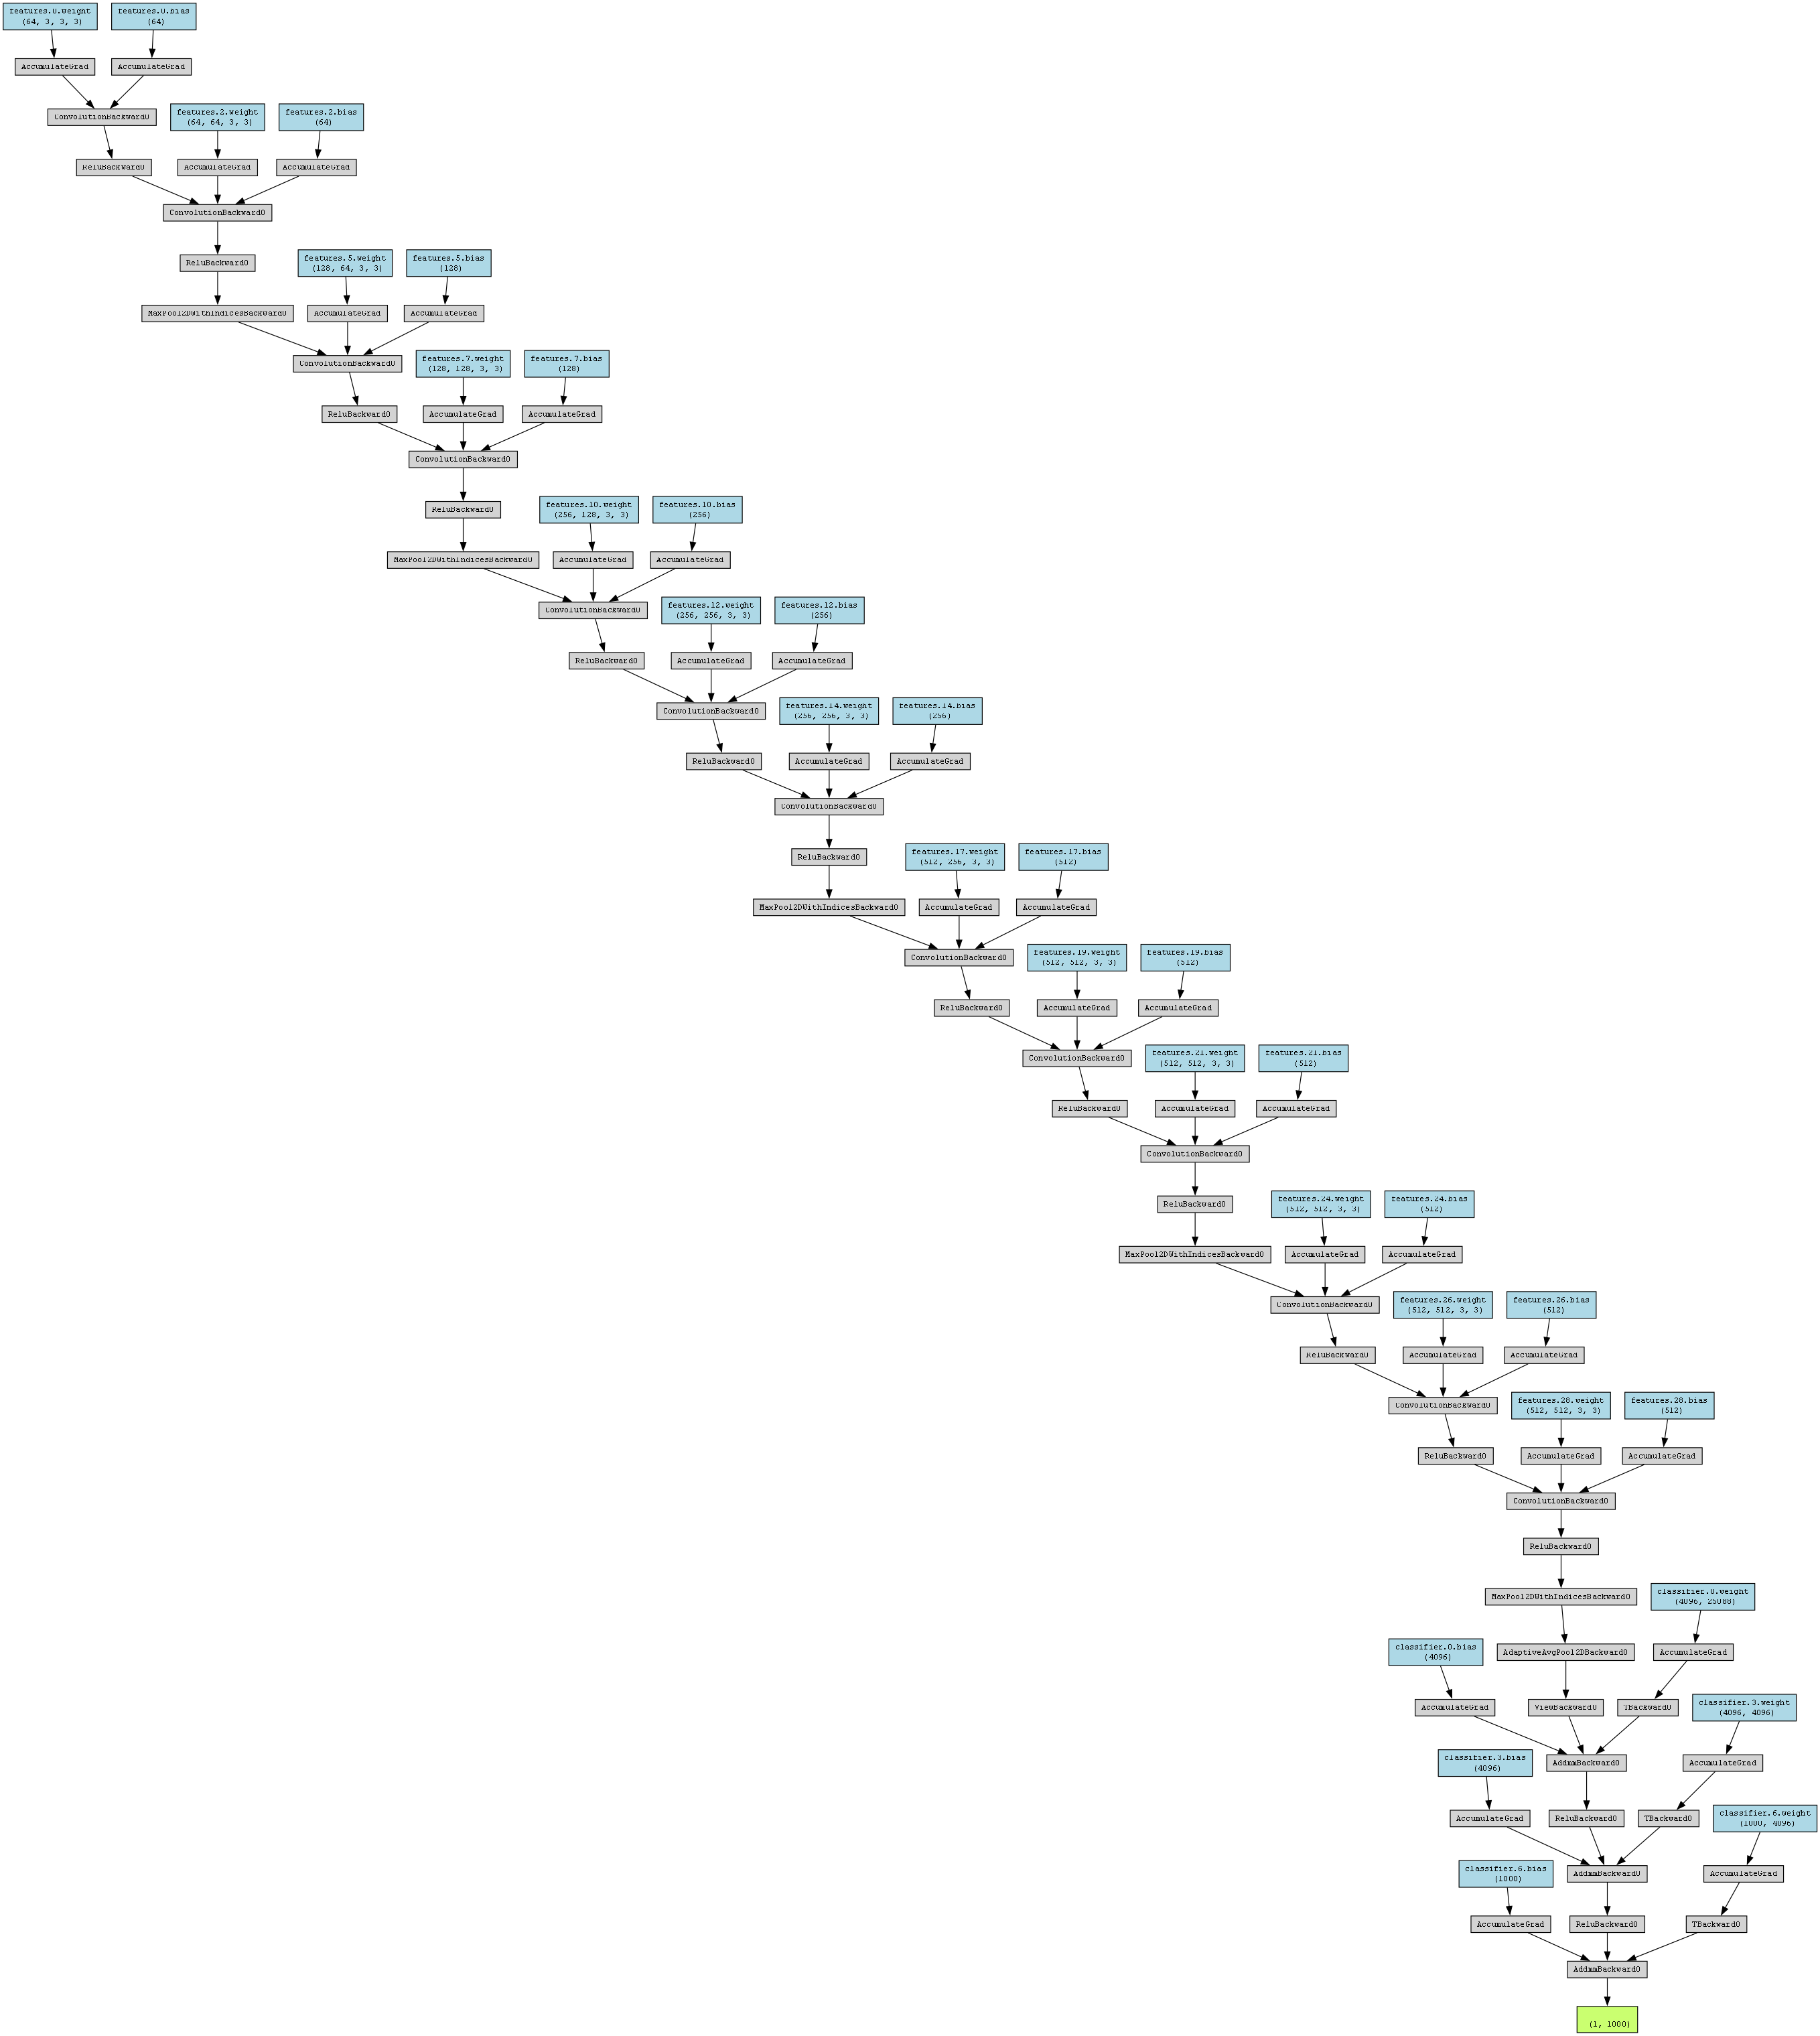

In [10]:
from torchviz import make_dot
from IPython.display import Image, display

dummy_input = torch.randn(1, 3, 64, 64, device=device)
print(dummy_input.shape)
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))
display(Image(dot.pipe(format='png')))